# MEA handling

This notebook shows how to handle MEA and electrodes in he 3D space.

In [22]:
import MEAutility as MEA
import matplotlib.pylab as plt

First, let's instantiate a MEA object among the available MEAs:

In [23]:
MEA.return_mea()

Available MEA: 
 ['SqMEA-6-25um', 'SqMEA-10-15um', 'circle_500', 'tetrode', 'Neuroseeker-128', 'SqMEA-5-30um', 'SqMEA-15-10um', 'Neuronexus-32-Kampff', 'Neuronexus-32-cut-30', 'Neuropixels-128', 'Neuroseeker-128-Kampff', 'Neuropixels-24', 'SqMEA-7-20um', 'Neuronexus-32', 'Neuropixels-384']


'plane' field with 2D dimensions assumed to be 'yz
Model is set to semi


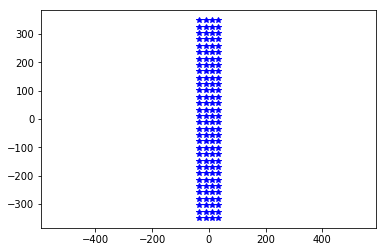

In [24]:
neuroseeker = MEA.return_mea('Neuroseeker-128')
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'b*')
_ = plt.axis('equal')

By default the MEA is instantiated with it's center of mass at (0,0,0) and electrodes lying in the plane specified in the yaml file (by default `plane` is `yz`)

In [25]:
neuroseeker.plane

'yz'

### Moving the probe around

The probe can be easily moved with a the `move` and `center` methods:

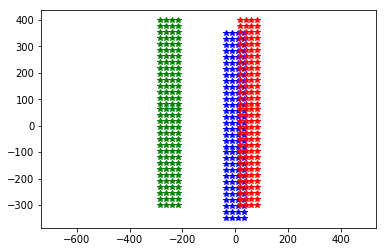

In [26]:
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'b*')
neuroseeker.move([0, 50, 50])
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'r*')
neuroseeker.move([0, -300, 0])
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'g*')
_ = plt.axis('equal')

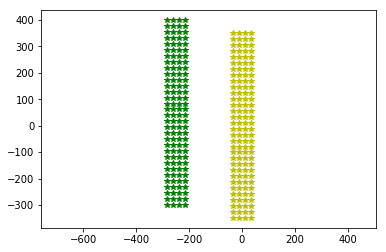

In [27]:
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'g*')
neuroseeker.center()
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'y*')
_ = plt.axis('equal')

### Rotating the probe

With the `rotate` method, MEA probes can be rotated along any axis by any angle (in degrees). The current plane and orientation of the probe is stored by the variables `main_axes` and `normal`

In [28]:
# main_axes indicate the MEA plane
print(neuroseeker.main_axes[0], neuroseeker.main_axes[1])

# normal indicates the axis perpendicular to the electrodes
print(neuroseeker.normal)

# normal axis is also stored by each electrode and could be changed separately
print(type(neuroseeker.electrodes[0]), neuroseeker.electrodes[0].normal)

[0 1 0] [0 0 1]
[-1.  0.  0.]
<class 'MEAutility.core.Electrode'> [-1.  0.  0.]


Now le's make some rotations!!

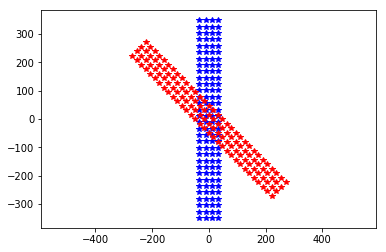

In [29]:
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'b*')
neuroseeker.rotate([1, 0, 0], 45)
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'r*')
_ = plt.axis('equal')

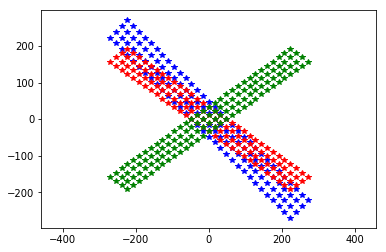

In [30]:
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'b*')
neuroseeker.rotate([0, 1, 0], 45)
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'r*')
neuroseeker.rotate([0, 1, 0], 90)
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'g*')
_ = plt.axis('equal')

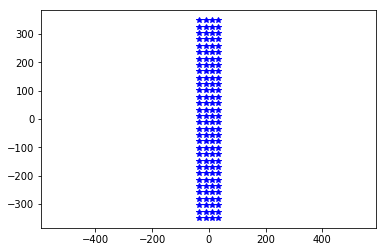

In [31]:
# back to normal
neuroseeker.rotate([0, 1, 0], -90)
neuroseeker.rotate([0, 1, 0], -45)
neuroseeker.rotate([1, 0, 0], -45)
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'b*')
_ = plt.axis('equal')